# Datasets Analysis for Modeling Semantic Plausibility: pep-3k

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# download punkt
# nltk.download('punkt')

## Load and Combine Files

In [4]:
def combine_datasets(file_paths):
    # Initialize an empty list to store individual dataframes
    dataframes = []
    
    # Iterate through file paths and load each CSV file
    for file_path in file_paths:
        data = pd.read_csv(file_path)
        dataframes.append(data)
    
    # Concatenate all dataframes into a single dataframe
    combined_data = pd.concat(dataframes, ignore_index=True)
    return combined_data

file_paths = ['dev.csv', 
              'test.csv', 
              'train.csv']

dataset = combine_datasets(file_paths)
print(dataset)

      label                  text
0         0   elephant vomit boat
1         1   tape attach sticker
2         1        knife dig bike
3         1        girl cut grape
4         1   policeman halt ball
...     ...                   ...
3057      0        wool clip dust
3058      1         rope hook pan
3059      0      bag contain tree
3060      1     gorilla bury leaf
3061      1  sidewalk curb wheels

[3062 rows x 2 columns]


##  Analyze Dataset Characteristics
### Aspect 1: Text Length Analysis
   - The dataset consistently demonstrates texts composed of merely three words each.
   - A simple S-V-O structure without any additional modifiers or complexities.

Text Length Statistics:
Mean of text length: 3.0
Median of text length: 3.0
Standard Deviation of text length: 0.0
Minimum of text length: 3.0
Maximum of text length: 3.0


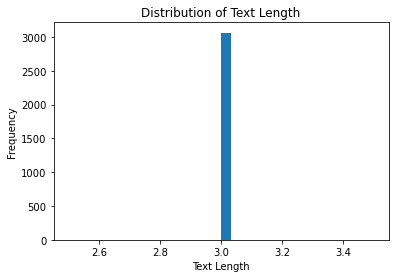

{'Mean of text length': 3.0,
 'Median of text length': 3.0,
 'Standard Deviation of text length': 0.0,
 'Minimum of text length': 3,
 'Maximum of text length': 3}

In [5]:
def text_length(dataset):
    
    dataset['text_length'] = dataset['text'].apply(lambda x: len(x.split()))
    
    #important statistics
    text_length_statistics = {
        'Mean of text length': dataset['text_length'].mean(),
        'Median of text length': dataset['text_length'].median(),
        'Standard Deviation of text length': dataset['text_length'].std(),
        'Minimum of text length': dataset['text_length'].min(),
        'Maximum of text length': dataset['text_length'].max()
    }

    print("Text Length Statistics:")
    for stat_name, stat_value in text_length_statistics.items():
        print(f"{stat_name}: {stat_value:.1f}")  
    
    #show it in histogram
    plt.hist(dataset['text_length'], bins=30)
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.title('Distribution of Text Length')
    plt.show()
    
    return text_length_statistics

text_length(dataset)

### Aspect 2: Word Count Analysis
- This dataset covers a relatively small pool of words (584 unique words). 

In [6]:
def total_words(dataset):
    
    # Combine text data into a single string
    all_text = ' '.join(dataset['text']).lower()

    tokens = word_tokenize(all_text)
    total_words_count = len(tokens)

    print(f"Total number of words in the dataset: {total_words_count}")

    return total_words_count

def total_unique_words(dataset):
    
    all_text = ' '.join(dataset['text']).lower()

    tokens = word_tokenize(all_text)
    unique_words = set(tokens)
    total_unique_words = len(unique_words)

    print(f"Total number of unique words in the dataset: {total_unique_words}")

    return total_unique_words

total_words(dataset)
total_unique_words(dataset)

Total number of words in the dataset: 9186
Total number of unique words in the dataset: 584


584

### Aspect 3: Word frequrncy Analysis
- These words exhibit a high level of repetition (584/9186), highlighting a significant frequency among certain words, with some repeting over a hundred times.

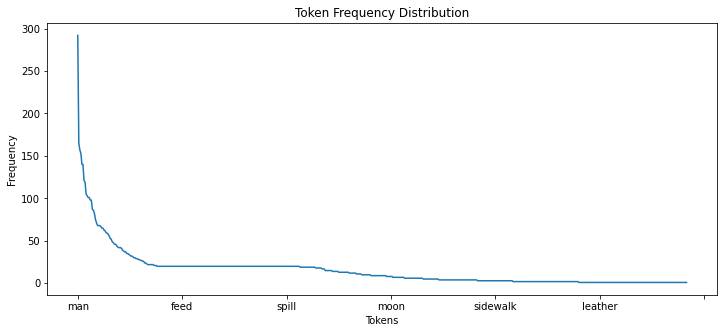

Top 10 frequent words and their frequencies:
man         292
air         165
dog         157
water       153
girl        140
elephant    140
hand        121
cat         119
house       105
child       103
dtype: int64


man       292
air       165
dog       157
water     153
girl      140
         ... 
school      1
worker      1
jaw         1
onions      1
jeans       1
Length: 584, dtype: int64

In [7]:
def token_frequency(dataset):
    
    all_text = ' '.join(dataset['text']).lower().split()
    token_frequency = pd.Series(all_text).value_counts()

    #Show the word frequency in line
    plt.figure(figsize=(12, 5))
    token_frequency.plot()
    plt.xlabel('Tokens')
    plt.ylabel('Frequency')
    plt.title('Token Frequency Distribution')
    plt.show()
    
    # Get the top 10 frequency words and their frequencies
    top_10_words = token_frequency.head(10)
    print("Top 10 frequent words and their frequencies:")
    print(top_10_words)

    return token_frequency
    
token_frequency(dataset)

### Aspect 4: Word Overlap Across Train, Dev, and Test Datasets Analysis
- A small percentage of new words is observed in the dev dataset (1.88%) and test dataset (1.71%).

Word Overlap Across Train, Dev, and Test Datasets:
Overlap words in three datasets: 233 (39.90%)
Overlap words in two datasets: 156 (26.71%)
Words only in Train: 174 (29.79%)
Words only in Dev: 11 (1.88%)
Words only in Test: 10 (1.71%)


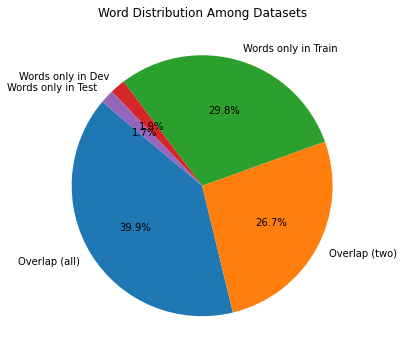

In [8]:
def word_overlap(train_data, dev_data, test_data):
    
    train_data = pd.read_csv(train_data)
    dev_data = pd.read_csv(dev_data)
    test_data = pd.read_csv(test_data)

    # Get sets of words from each dataset
    train_words = set([word.lower() for text in train_data['text'] for word in text.split()])
    dev_words = set([word.lower() for text in dev_data['text'] for word in text.split()])
    test_words = set([word.lower() for text in test_data['text'] for word in text.split()])

    # Calculate overlapping words
    overlap_in_three = train_words.intersection(dev_words, test_words)
    overlap_in_two = (train_words.intersection(dev_words) | train_words.intersection(test_words) | dev_words.intersection(test_words)) - overlap_in_three

    # Calculate unique words in each dataset
    train_unique = train_words - (overlap_in_three | overlap_in_two)
    dev_unique = dev_words - (overlap_in_three | overlap_in_two)
    test_unique = test_words - (overlap_in_three | overlap_in_two)

    # Calculate counts and percentages
    total_words = len(train_unique) + len(dev_unique) + len(test_unique) + len(overlap_in_three) + len(overlap_in_two)
    overlap_in_three_count = len(overlap_in_three)
    overlap_in_two_count = len(overlap_in_two)
    train_unique_count = len(train_unique)
    dev_unique_count = len(dev_unique)
    test_unique_count = len(test_unique)

    # Calculate percentages
    overlap_in_three_percentage = (overlap_in_three_count / total_words) * 100
    overlap_in_two_percentage = (overlap_in_two_count / total_words) * 100
    train_unique_percentage = (train_unique_count / total_words) * 100
    dev_unique_percentage = (dev_unique_count / total_words) * 100
    test_unique_percentage = (test_unique_count / total_words) * 100

    # Store statistics
    labels = ['Overlap (all)', 'Overlap (two)', 'Words only in Train', 'Words only in Dev', 'Words only in Test']
    sizes = [ overlap_in_three_count, overlap_in_two_count, train_unique_count, dev_unique_count, test_unique_count]
  
    # Display statistics
    print("Word Overlap Across Train, Dev, and Test Datasets:")
    print("Overlap words in three datasets:", overlap_in_three_count, f"({overlap_in_three_percentage:.2f}%)")
    print("Overlap words in two datasets:", overlap_in_two_count, f"({overlap_in_two_percentage:.2f}%)")
    print("Words only in Train:", train_unique_count, f"({train_unique_percentage:.2f}%)")
    print("Words only in Dev:", dev_unique_count, f"({dev_unique_percentage:.2f}%)")
    print("Words only in Test:", test_unique_count, f"({test_unique_percentage:.2f}%)")
    
    # Show in pie graph
    plt.figure(figsize=(8, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title('Word Distribution Among Datasets')
    plt.show()

train_data = 'train.csv'
dev_data = 'dev.csv'
test_data = 'test.csv'

word_overlap(train_data, dev_data, test_data)

### Aspect 5: 